# Characterizing data distribution

#### We want to represent the dataset in a human-friendly format to get a good impression of it. This is a kind of dataset "identity card".

- Data format : autoML

In [58]:
data_dir = '../data'

datasets = {'iris': (data_dir + '/iris', 'iris'),
            'iris_1': (data_dir + '/iris_1', 'iris'),
            'iris_2': (data_dir + '/iris_2', 'iris'),
            'mimic': (data_dir + '/mimic', 'mimic'),
            'mushrooms': (data_dir + '/mushrooms', 'mushrooms'),
            'chems': (data_dir + '/chems', 'chems'),
            'credit': (data_dir + '/credit_data', 'credit'),
            'squares': (data_dir + '/squares', 'squares'),
            'squares_2': (data_dir + '/squares_2', 'squares'),
            'adult': (data_dir + '/adult', 'adult')}

input_dir, basename = datasets['chems']

## Characterization

### Visualization
- Scatter plot matrix
- Classes distribution
- Hierarchical clustering with heatmap matrix
- Hierarchical clustering with correlation matrix
- Principal components analysis (PCA)
- Linear discriminant analysis (LDA)
- T-distributed stochastic neighbor embedding (t-SNE algorithm)

### Meta features

- **Simple features, Simple Measurements or General Data Characteristic** are directly and easily accessible properties of the dataset wich need almost no computations such as number of classes or number of attributes.
    
    - Number of records: $n$
    - Number of attributes: $m$
    -  Number of classes: $q$
    -  Ratio of symbolic attributes: $\frac{m_{symb}}{m}$
    -  DatasetRatio $=\frac{NumberOfFeatures}{NumberOfInstances}$  
    -  Default error rate: $1 - Acc_{def}$ where $Acc_{def}$ is the probability of the largest class or default accuracy.
    -  Standard deviation of the class distribution: $\sigma_{class}$
    -  Relative probability of defective records: $\frac{n_{defTuple}}{n}$ where $n_{defTuple}$ is the number of records with missing values.
    -  Relative probability of missing values: $\frac{h_{missVal}}{n \times m}$ where $h_{missVal}$ is the number of missing values.

<br>   
- **Statistical features** use statistical analysis methods and tests (Engels and Theusinger, 1998; Sohn 1999).
    
    - Kurtosis: Fourth central moment divided by the square of the variance $\frac{E[(x_i-E[x_i])^4]}{[E[(x_i-E[x_i])^4]]^2}$ where $x_i$ is the ith feature. 
    - PCAKurtosis: Transform the dataset X by PCA, then compute the kurtosis
    - SkewnessMin: min over skewness of all features. Skewness measures the symmetry of a distribution. A skewness value > 0 means that there is more weight in the left tail of the distribution

<br> 
- **Discriminant Measurements** compute a discriminant analysis leading to the following measurements:
    
    -  Relative importance if the largest eigenvalue as an indication for the importance of the $1{\text{st}}$ discriminant function
    -  Canonical correlation, which is an indicator for the degree of correlation between the most significant discriminant function and class distribution. There is a strong correlation between the classes and the $1{\text{st}}$ discriminant function if this measurement is close to unity.
    -  Number of discriminant functions
    -  Wilks Lambda describes the significance of the r discriminant functions and is defined as follows:
        
        $$ \Lambda = \Pi^{DiscFct}_{j=1} \frac{1}{1 + \lambda_j} $$
        
        If Wlambda is near zero, in principle this indicates there is a good possibility for making good discriminations.

<br> 
-  **Information-theoric features** typically use entropy measures of the attributes and the class label (Segrera et al., 2008).
    
    -  ClassEntropy $= mean(-\sum_{i=1}^{n}p(Class_i)ln(p(Class_i)))$ where $p(Class_i)$ is the probability of having an instance of Class\_i
    -  Join entropy
    -  Average attribute entropy
    -  Average mutual information
    -  Relevance-measure
    -  Signal Noise Ratio

<br> 
-  **Model-based features** create a model of the data, e.g. a decision tree, and use properties of it, e.g. the width and height of the tree, as features (Peng et al., 2002 used 17 properties of a decision tree).

<br> 
-  **Landmarking features** apply fast computable classifiers, e.g. Naive Bayes or 1-Nearest Neighbor, on the dataset (Pfahringer et al., 2000; Bensusan and Giraud-Carrier, 2000) and use the resulting performance as meta-features. This can be done with several metrics.
    
    <!-- -  Landmark[Some\_Model]: accuracy of [Some\_Model] applied on dataset. -->
    <!-- -  LandmarkDecisionNodeLearner \& LandmarkRandomNodeLearner: Both are decision tree with max\_depth=1. `DecisionNode' considers all features when looking for best split, and `RandomNode' considers only 1 feature, where comes the term `random'. -->

<br> 
-  **Time-based features** are specialized for time predictions. They contain time measures of several computations regarding the dataset, e.g. the time for computing the other meta-features. Meta-features of this group have the benefit that they are able to take the performance of the computer into account. In (Reif et al., 2011) they present nine different time-measures.
    
    -  Training time ?
    -  Testing time ?

<!-- 
A voir : Algorithm Characteristics

ClassProbabilityMin $= min_{i=1 \dots n}(p(Class_i))= min_{i=1 \dots n}(\frac{NumberOfInstances\_Class_i}{TotleNumberOfInstances}) $

NumSymbols: For each categorial feature, compute how many unique values there is ???

Interpretability of the model ? -->

In [59]:
# Imports

# AutoML
problem_dir = '../data_manager/'  
from sys import path
path.append(problem_dir)
%matplotlib inline
%load_ext autoreload
%autoreload 2

from auto_ml import AutoML

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Read data

In [61]:
#D = AutoML(input_dir, basename)
#D = AutoML.from_csv(input_dir, basename, 'adult.data', seps=[',\s', ' '], headers=[None, None])
#D = AutoML.from_csv(input_dir, basename, 'mushrooms.csv', target=-1)
D = AutoML.from_csv(input_dir, basename, 'chemsdata.csv')

------- Recap of files ------
X: Yes
X train: No
X test: No 

y: No
y train: No
y test: No 



In [62]:
D.show_info()

Name: Chems
Feat num: 43
Has categorical: 0
Time budget: 600
Is sparse: 0
Usage: No info file
Format: Dense
Has missing: 0
Feat type: Mixed


In [63]:
data, target = D.get_data_as_df()

In [64]:
data.keys()

dict_keys(['X'])

In [65]:
target.keys()

dict_keys([])

### Preprocessing

For numerical variables:
    - Replace missing values, NaN, with the median
    - Replace +Inf by the maximum and -Inf by the minimum
    - Normalization (standard or min-max)

For categorical variables:
    - Replace missing values by 'missing'
    - Encoding (label, one-hot or likelihood)



In [66]:
from preprocessing import preprocess

X = preprocess(data['X'], normalization='standard', categorical='label')

# Visualization

In [48]:
D.compute_descriptors()

In [50]:
D.descriptors

{'class_deviation': 0.47856247301278126,
 'missing_proba': 0.0,
 'ratio': 0.0380952380952381,
 'skewness_max': 0.3285767696058563,
 'skewness_mean': -0.2994641239395824,
 'skewness_min': -1.4075720510368281,
 'symb_ratio': 0.0}

In [9]:
D.train_test_split(train_size=0.8, test_size=0.2)

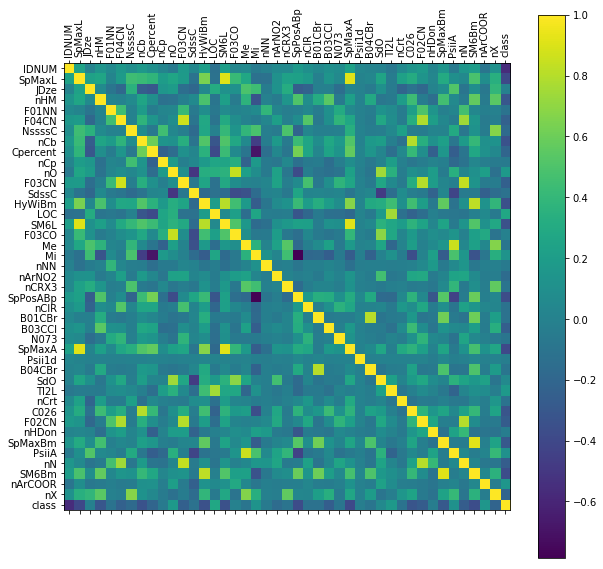

In [67]:
from utilities import show_correlation

show_correlation(X)